In [72]:
import pandas as pd

In [74]:
data=pd.read_csv('election.csv')

In [76]:
data.head(5)

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [78]:
data.shape

(8902, 10)

In [80]:
data.isnull().any()

ID              False
State           False
Constituency    False
Candidate       False
Party           False
EVM Votes       False
Postal Votes    False
Total Votes     False
% of Votes      False
Result          False
dtype: bool

In [82]:
data.duplicated().sum()

0

# DATA PREPROCESSING

In [85]:
from sklearn.preprocessing import LabelEncoder
clmn=['State','Constituency','Candidate','Party','Result']
label_encoder= LabelEncoder()
for column in clmn:
    data[column]=label_encoder.fit_transform(data[column])
print(data.head(10))

   ID  State  Constituency  Candidate  Party EVM Votes Postal Votes  \
0   1      0            30       1374    158    102182          254   
1   2      0            30       3688    289     77829          211   
2   3      0            30       4146     83      8236           18   
3   4      0            30       1663    227      6009            8   
4   5      0            30       7708    282      2195            8   
5   6      0            30       3167     55       911            3   
6   7      0            30       2040    121       714            5   
7   8      0            30       6111    282       539            3   
8   9      0            30       3189    282       506            1   
9  10      0            30       7673    282       378            2   

   Total Votes % of Votes  Result  
0       102436      50.58       1  
1        78040      38.54       0  
2         8254       4.08       0  
3         6017       2.97       0  
4         2203       1.09       0  
5 

In [87]:
from sklearn.preprocessing import StandardScaler
numerical_columns=['EVM Votes','Postal Votes','Total Votes','% of Votes']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
scaler=StandardScaler()
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])
print(data.head())

   ID  State  Constituency  Candidate  Party  EVM Votes  Postal Votes  \
0   1      0            30       1374    158   0.168278     -0.146707   
1   2      0            30       3688    289   0.032121     -0.178918   
2   3      0            30       4146     83  -0.356972     -0.323494   
3   4      0            30       1663    227  -0.369423     -0.330985   
4   5      0            30       7708    282  -0.390747     -0.330985   

   Total Votes  % of Votes  Result  
0     0.166434    3.041252       1  
1     0.030817    2.218236       0  
2    -0.357123   -0.137341       0  
3    -0.369559   -0.213217       0  
4    -0.390761   -0.341728       0  


# Outliers Handling & Detection

In [90]:
def remove_outliers(data):
    Q1=data['Total Votes'].quantile(0.25)
    Q3=data['Total Votes'].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    data=data[(data['Total Votes']>=lower) & (data['Total Votes']<=upper)]
    return data

In [92]:
df=remove_outliers(data)

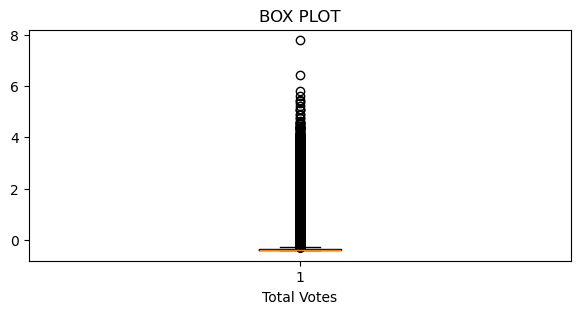

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,3))
plt.boxplot(data['Total Votes'])
plt.title("BOX PLOT")
plt.xlabel("Total Votes")
plt.show()

In [96]:
def remove_outliers(data):
    Q1=data['Total Votes'].quantile(0.25)
    Q3=data['Total Votes'].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    data=data[(data['Total Votes']>=lower) & (data['Total Votes']<=upper)]
    return data

In [98]:
df=remove_outliers(data)

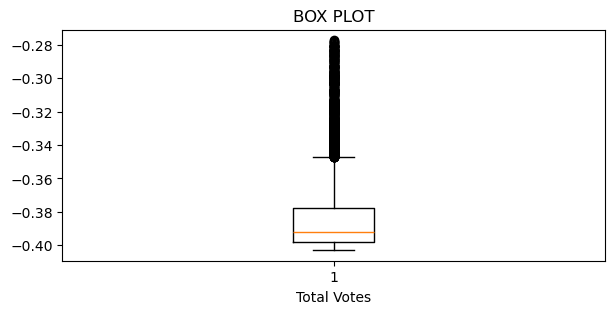

In [102]:
import seaborn as sns
plt.figure(figsize=(7,3))
plt.boxplot(df['Total Votes'])
plt.title("BOX PLOT")
plt.xlabel("Total Votes")
plt.show()

In [103]:
import seaborn as sns
plt.figure(figsize=(7,))
plt.boxplot(df['Total Votes'])
plt.title("BOX PLOT")
plt.xlabel("Total Votes")
plt.show()

TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

# Data Visualizations

In [178]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [ ]:
plt.scatter(data['Party'],data['Total Votes'])
plt.title("scatter plot")
plt.xlabel("party")
plt.ylabel("votes")


In [ ]:
sns.countplot(x="State", data = data) 
plt.title("Count Plot")

In [ ]:
sns.countplot(x="Result", data = data) 
plt.title("Count Plot")

<Axes: ylabel='Frequency'>

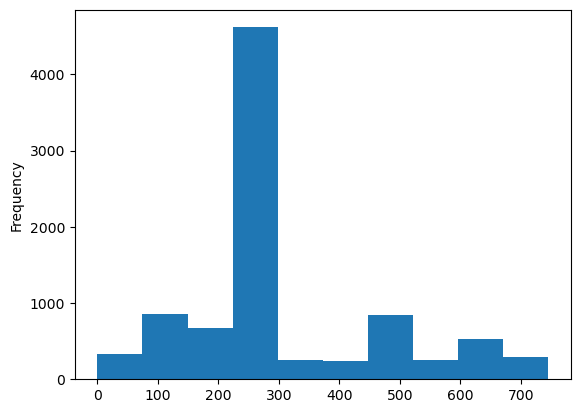

In [104]:
data['Party'].plot.hist()

<Axes: ylabel='Frequency'>

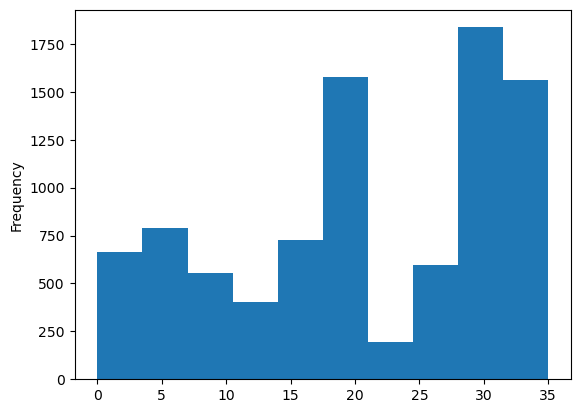

In [106]:
data['State'].plot.hist()

Text(0.5, 1.0, 'Heat Map')

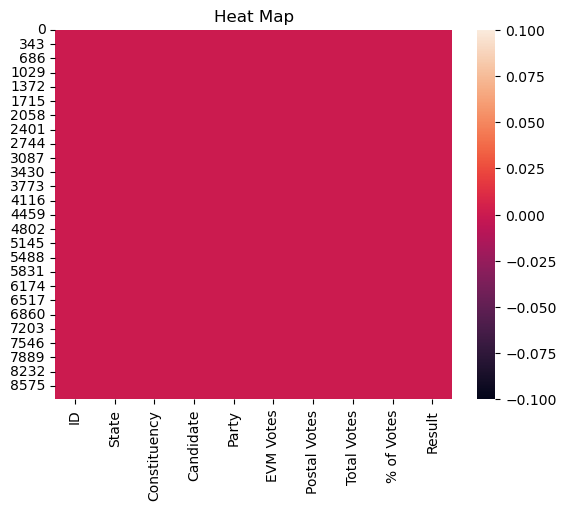

In [108]:
sns.heatmap(data.isnull())
plt.title("Heat Map")

Text(0.5, 1.0, 'Histplot')

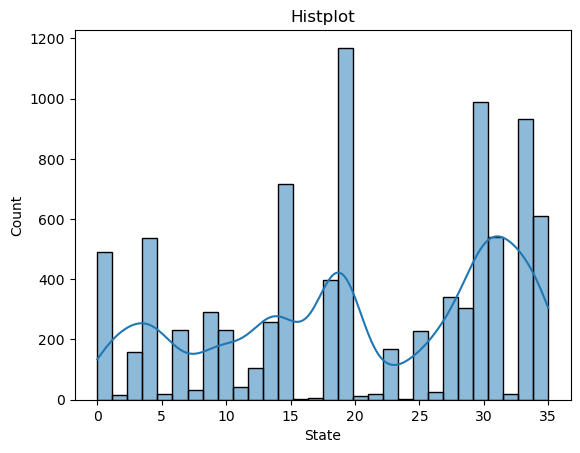

In [110]:
sns.histplot(data['State'],bins=30,kde=True)
plt.title("Histplot")

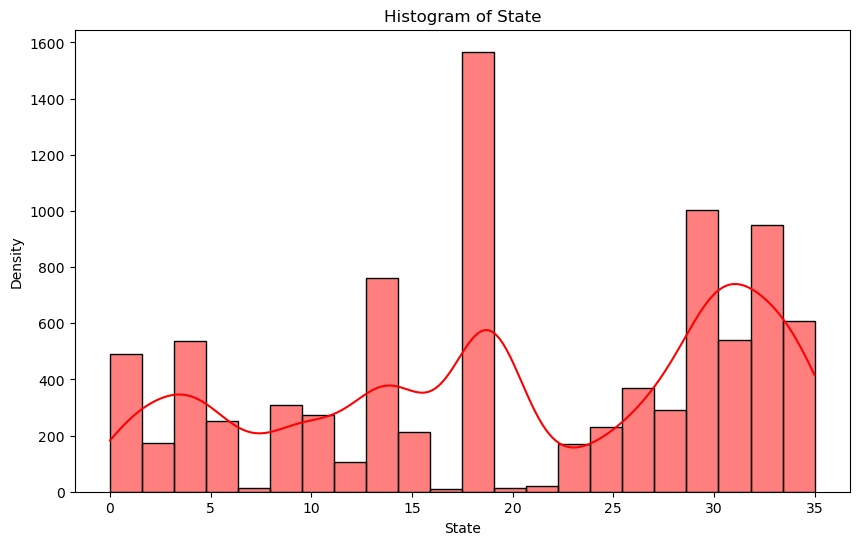

In [111]:
x = data['State']  
plt.figure(figsize=(10, 6))  
sns.histplot(x, color='red', kde=True)
plt.xlabel('State')
plt.ylabel('Density')
plt.title('Histogram of State')
plt.show()

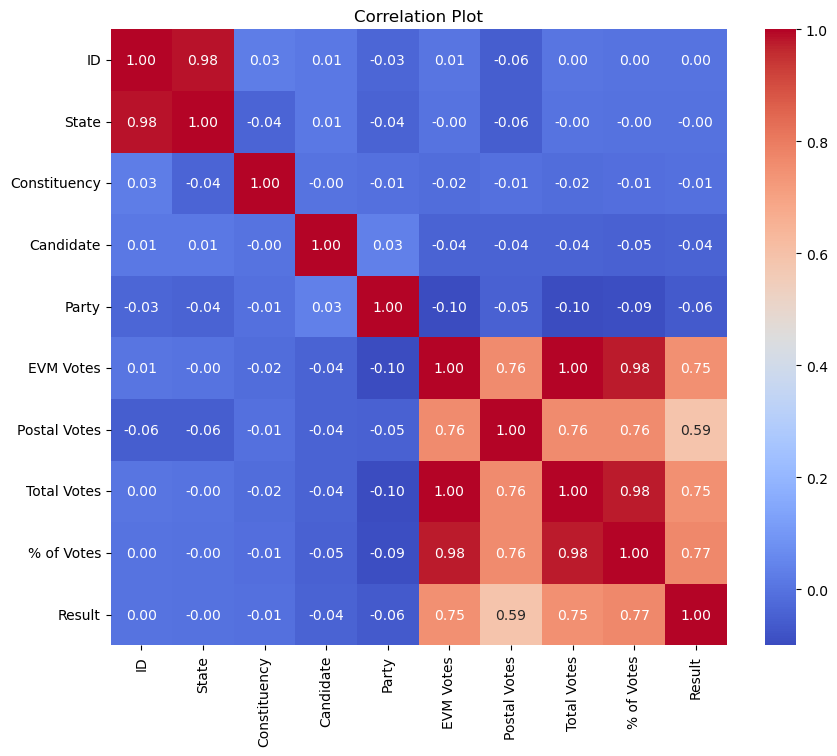

In [112]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Plot')
plt.show()

# LINEAR REGRESSION

In [115]:
X = data[['EVM Votes', 'Postal Votes', 'State', 'Party']]  
y = data['Total Votes'] 

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [118]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [119]:
y_pred=lr.predict(X_test)
print(y_pred)

[-0.40002036 -0.39243148 -0.38860093 ... -0.39760358 -0.2793241
 -0.35541331]


In [120]:
lr.predict(X_test.iloc[0].values.reshape(1, -1))

C:\Users\alka2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.40002036])

In [122]:
lr.predict(X_test.iloc[1].values.reshape(1,-1))

C:\Users\alka2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.39243148])

# Model Performance Of Linear Regression

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
mse = mean_squared_error(y_test, y_pred)
mse

3.946524451742159e-07

In [135]:
r2 = r2_score(y_test, y_pred)
r2

0.9999995823249168

In [137]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [139]:
r2

0.9999995823249168

C:\Users\alka2\AppData\Local\Temp\ipykernel_2476\3689861945.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Diagonal line


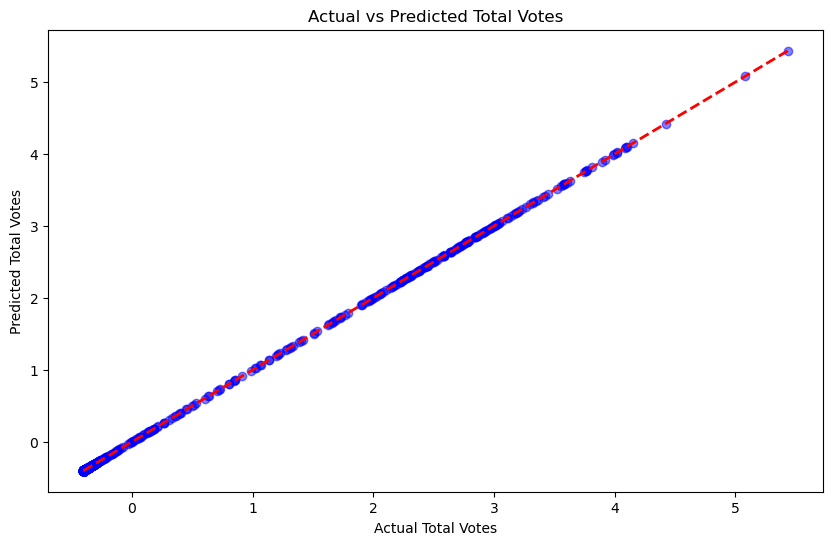

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Diagonal line
plt.xlabel('Actual Total Votes')
plt.ylabel('Predicted Total Votes')
plt.title('Actual vs Predicted Total Votes')
plt.show()

In [143]:
#y=mx+c

# LOGISTIC REGRESSION

In [146]:
X = data.drop(['Result', 'Candidate', 'Constituency'], axis=1)  #dropping unrequired columns and defining the independent variable
y=data['Result']

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [150]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\alka2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
y_pred=LR.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


# Model Performance Of Logistic Regression

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [157]:
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred,average='micro'))
print("recall score",recall_score(y_test,y_pred,average='micro'))
print("classification report",classification_report(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test, y_pred))

accuracy 0.9657495788882651
precision 0.9657495788882651
recall score 0.9657495788882651
classification report               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1669
           1       0.69      0.81      0.75       112

    accuracy                           0.97      1781
   macro avg       0.84      0.89      0.87      1781
weighted avg       0.97      0.97      0.97      1781

confusion matrix [[1629   40]
 [  21   91]]


# DECISION TREE

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
model=DecisionTreeClassifier()

In [164]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [166]:
y_pred1=model.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

# Model Performance Of Decision Tree

In [169]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,roc_curve,roc_auc_score,auc,confusion_matrix

In [171]:
print("accuracy",accuracy_score(y_test,y_pred1))
print("precision",precision_score(y_test,y_pred1,average='micro'))
print("recall score",recall_score(y_test,y_pred1,average='micro'))
print("classification report",classification_report(y_test,y_pred1))

accuracy 0.9758562605277934
precision 0.9758562605277934
recall score 0.9758562605277934
classification report               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1669
           1       0.78      0.86      0.82       112

    accuracy                           0.98      1781
   macro avg       0.89      0.92      0.90      1781
weighted avg       0.98      0.98      0.98      1781



roc curve

In [174]:
from sklearn.model_selection import learning_curve

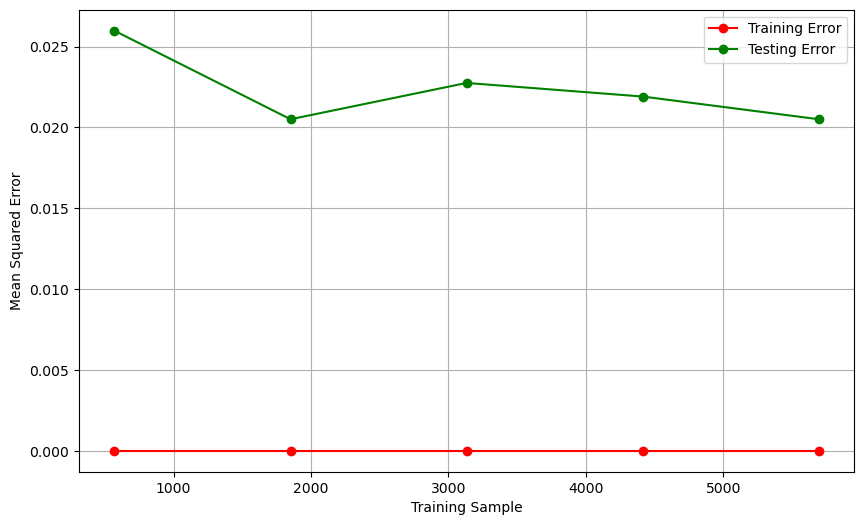

In [180]:
def plot_learning_curve(estimator, X_train, y_train, cv=None, train_sizes=np.linspace(0.1,1.0,5)):
    train_size, train_score, test_score = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_score_mean = -np.mean(train_score, axis=1)
    test_score_mean = -np.mean(test_score, axis=1)
    plt.figure(figsize=(10,6))
    plt.plot(train_size,train_score_mean, 'o-', color='red', label ='Training Error')
    plt.plot(train_size,test_score_mean, 'o-', color='green', label ='Testing Error')
    plt.xlabel("Training Sample")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Classifier = DecisionTreeClassifier()
plot_learning_curve(Classifier, X_train, y_train, cv=5)


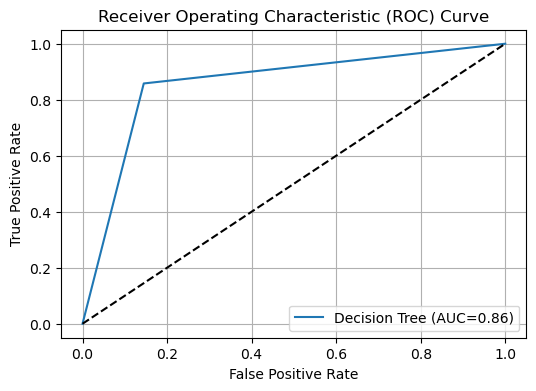

In [182]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred_probability = model.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="Decision Tree (AUC=%0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest

In [305]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [307]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
rf_model=RandomForestClassifier()

In [311]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [312]:
rf_pred=rf_model.predict(X_test)

# Model Performance Of Random Forest

In [316]:
print("accuracy",accuracy_score(y_test,rf_pred))
print("precision",precision_score(y_test,rf_pred,average='micro'))
print("recall score",recall_score(y_test,rf_pred,average='micro'))
print("classification report",classification_report(y_test,rf_pred))

accuracy 0.885
precision 0.885
recall score 0.885
classification report               precision    recall  f1-score   support

           0       0.89      0.88      0.88        97
           1       0.88      0.89      0.89       103

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



In [318]:
from sklearn.model_selection import learning_curve

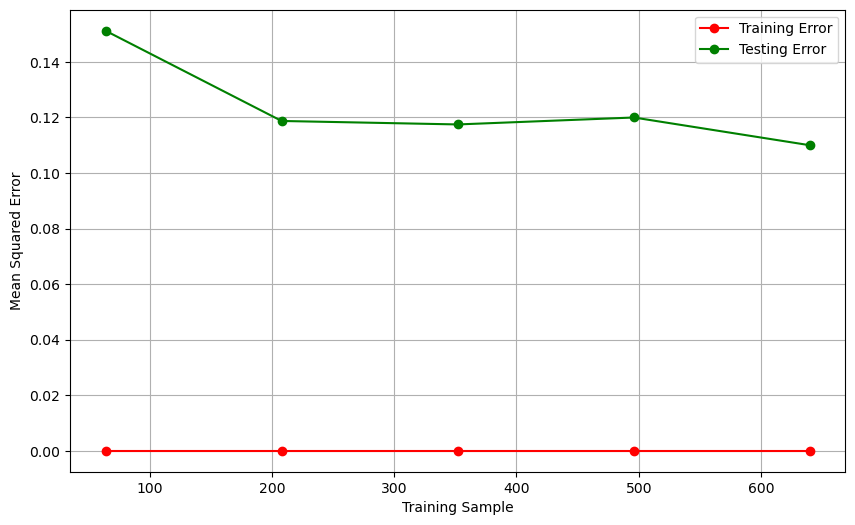

In [320]:
def plot_learning_curve(estimator, X_train, y_train, cv=None, train_sizes=np.linspace(0.1,1.0,5)):
    train_size, train_score, test_score = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_score_mean = -np.mean(train_score, axis=1)
    test_score_mean = -np.mean(test_score, axis=1)
    plt.figure(figsize=(10,6))
    plt.plot(train_size,train_score_mean, 'o-', color='red', label ='Training Error')
    plt.plot(train_size,test_score_mean, 'o-', color='green', label ='Testing Error')
    plt.xlabel("Training Sample")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Classifier = RandomForestClassifier()
plot_learning_curve(Classifier, X_train, y_train, cv=5)


# K-Nearest Neighbors

In [322]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [323]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [324]:
knn_pred = knn.predict(X_test)

# Model Performance Of KNN

In [326]:
print("accuracy",accuracy_score(y_test,knn_pred))
print("precision",precision_score(y_test,knn_pred,average='micro'))
print("recall score",recall_score(y_test,knn_pred,average='micro'))
print("classification report",classification_report(y_test,knn_pred))
print("confusion matrix",confusion_matrix(y_test, knn_pred))

accuracy 0.77
precision 0.77
recall score 0.77
classification report               precision    recall  f1-score   support

           0       0.73      0.84      0.78        97
           1       0.82      0.71      0.76       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200

confusion matrix [[81 16]
 [30 73]]
